<a href="https://colab.research.google.com/github/sztistvan/change_detection/blob/main/change_point_detection_chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change Point Detection in Time Series using ChatGPT

## First experiment

**QUERY**: I need a python code that runs on time series data, which is a one-dimensional signal. The routine should detect abrupt changes in the time series signal. The parameters for the abrupt change define a) the change in percent in the range of the whole amplitude, and b) the maximum time interval within the change should happen. This is given in a number of samples. The time series data is given in pandas dataframe, in one column called "signal".

In [64]:
import pandas as pd

def detect_abrupt_changes(signal, percent_change, max_time_interval):
    """
    Detect abrupt changes in a time series signal based on the specified parameters.
    
    Parameters:
        signal (pandas.Series): One-dimensional time series signal.
        percent_change (float): The minimum percentage change in the signal range that is considered an abrupt change.
        max_time_interval (int): The maximum time interval in samples between two data points to be considered part of the same change.
    
    Returns:
        pandas.Series: A boolean mask indicating the positions of the abrupt changes in the input signal.
    """
    # Calculate the absolute change in the signal.
    abs_change = abs(signal.diff())
    
    # Calculate the threshold for the minimum change required to be considered an abrupt change.
    change_threshold = (signal.max() - signal.min()) * percent_change
    
    # Initialize a mask of False values to indicate no abrupt changes have been detected yet.
    abrupt_changes = pd.Series(False, index=signal.index)
    
    # Loop over each data point in the signal.
    for i in range(1, len(signal)):
        # If the absolute change is greater than the threshold, mark this data point as the start of an abrupt change.
        if abs_change[i] >= change_threshold:
            abrupt_changes[i] = True
            
            # Keep track of the end of the current change.
            end_of_change = i
            
            # Continue checking subsequent data points to see if they are still part of the same change.
            for j in range(i+1, min(i+max_time_interval, len(signal))):
                if abs_change[j] >= change_threshold:
                    # If the change is still above the threshold, mark this data point as part of the same change.
                    abrupt_changes[j] = True
                    
                    # Update the end of the current change.
                    end_of_change = j
                else:
                    # If the change has fallen below the threshold, stop checking subsequent data points.
                    break
            
            # Skip checking data points that are already part of the current change.
            i = end_of_change
    
    return abrupt_changes


This function takes in a `pandas.Series` object called `signal` that contains the time series data in a single column, along with the `percent_change` and `max_time_interval` parameters that define the minimum change in percent and the maximum time interval in samples for an abrupt change to be detected. The function returns a boolean mask indicating the positions of the abrupt changes in the input signal.

To use this function, you can simply call it with the appropriate arguments, like this:

In [ ]:
abrupt_changes = detect_abrupt_changes(signal['signal'], 0.1, 10)

In this example, we assume that the time series data is stored in a `pandas.DataFrame` object called `signal`, and the signal data is stored in a single column called `"signal"`. We also set the `percent_change` parameter to `0.1`, meaning that an abrupt change must be at least a 10% change in the range of the signal. We set the `max_time_interval` parameter to `10`, meaning that an abrupt change must occur within 10 samples of the previous change in order to be considered part of the same change. The output of the function is stored in a boolean mask called `abrupt_changes`, where `True` values indicate the positions of the abrupt changes in the input signal.

**QUERY**: To test this routine, generate a random pandas time series

In [12]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate a random time series with 1000 data points
signal = pd.Series(np.random.normal(0, 1, 1000), index=pd.date_range('2022-01-01', periods=1000, freq='D'))

# Add some abrupt changes to the time series
signal.loc['2022-02-05':'2022-02-15'] -= 5
signal.loc['2022-03-10':'2022-03-20'] += 3.5
signal.loc['2022-04-05':'2022-04-08'] -= 4


In this example, we first set the random seed to ensure reproducibility. Then, we generate a time series with 1000 data points using `pd.Series()` and `np.random.normal()`, where the mean is 0 and the standard deviation is 1. We set the index of the time series using `pd.date_range()` to generate daily timestamps starting from January 1st, 2022. Finally, we add some abrupt changes to the time series by modifying the values of certain time ranges using `loc[]`.

You can then use the detect_abrupt_changes() function from my previous answer to detect the abrupt changes in this time series, like this:

In [13]:
abrupt_changes = detect_abrupt_changes(signal, 0.1, 5)
print(abrupt_changes)

2022-01-01    False
2022-01-02    False
2022-01-03    False
2022-01-04    False
2022-01-05     True
              ...  
2024-09-22    False
2024-09-23     True
2024-09-24    False
2024-09-25     True
2024-09-26    False
Freq: D, Length: 1000, dtype: bool


In this example, we set the `percent_change parameter` to 0.5 and the `max_time_interval` parameter to `5`. The output of the function will be a boolean mask indicating the positions of the abrupt changes in the time series. You can print this mask to see the results.

**QUERY**: OK, I need a graphical representation of the result

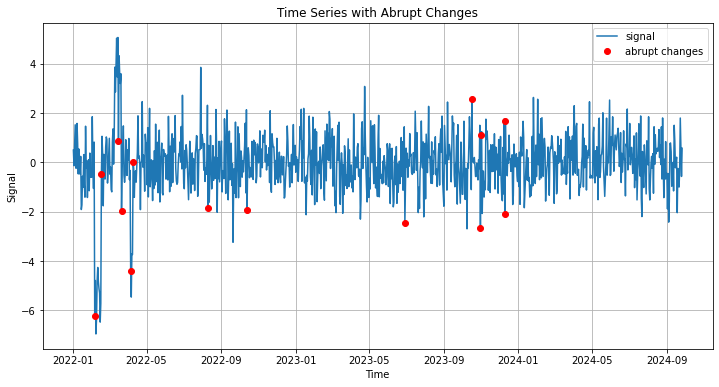

In [14]:
import matplotlib.pyplot as plt

# Plot the time series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')

# Plot the abrupt changes
abrupt_changes = detect_abrupt_changes(signal, 0.3, 10)
abrupt_changes = abrupt_changes.astype(int)
ax.plot(signal[abrupt_changes==1], 'ro', label='abrupt changes')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


*Remark*: I needed to modify the code that ChatGPT has created, it contained some errors. 

## Create own test data

In [4]:
import numpy as np
import pandas as pd

def generate_signal(num_points):
    """
    Generate a stochastic signal with multiple change points in mean and standard deviation.
    """
    s = np.zeros(num_points)
    s = np.concatenate([np.random.normal(loc=0, scale=1, size=num_points // 6),
                              np.random.normal(loc=1.0, scale=1, size=num_points // 6),
                              np.random.normal(loc=1.0, scale=2, size=num_points // 6),   
                              np.random.normal(loc=5, scale=1, size=num_points // 6),
                              np.random.normal(loc=5, scale=2, size=num_points // 6),
                              np.random.normal(loc=-2, scale=1, size=num_points // 6)])
    # Set the random seed for reproducibility

    # Generate a random time series with 1000 data points
    signal = pd.Series(s, index=pd.date_range('2022-01-01', periods=num_points, freq='D'))
    return signal

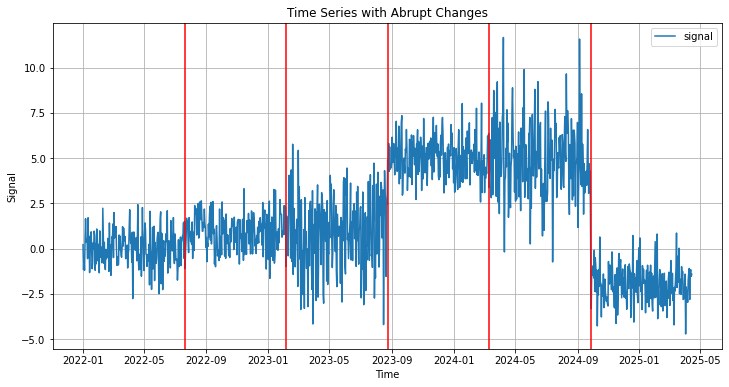

In [5]:
import matplotlib.pyplot as plt

# Create a random stochastic time series with different regions
n = 1200
signal = generate_signal(1200)
                         
# mark changes
result = [n//6,2*n//6,3*n//6,4*n//6,5*n//6]

# Plot the time series with change point locations
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')
for i in signal.index[result]:
    ax.axvline(i, color='r')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

## Apply the `detect_abrupt_changes` function

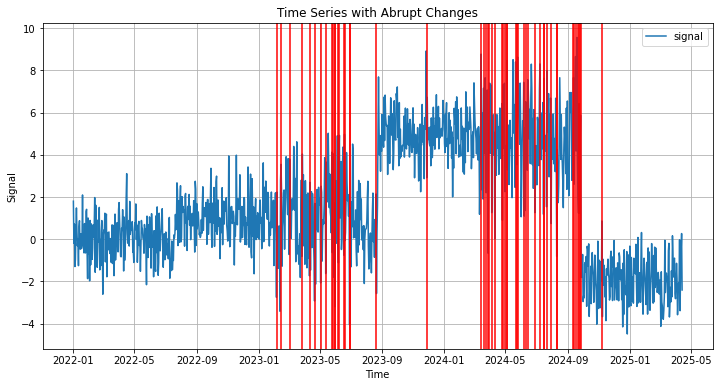

In [65]:
# Detect abrupt changes
abrupt_changes = detect_abrupt_changes(signal, 0.3, 10)
abrupt_changes = abrupt_changes.astype(int)

# Plot the time series 
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')

# Plot the abrupt changes
for i in signal.index[abrupt_changes == 1]:
    ax.axvline(i, color='r')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

## Different variations
The followng functions have been generated by ChatGPT, but I made some changes in the logic.

In [9]:
import pandas as pd
import numpy as np

def detect_abrupt_changes(signal, percent_change, max_interval):
    """
    Detects abrupt changes in a time series signal.

    Args:
        signal (pandas.Series): One-dimensional time series signal.
        percent_change (float): Minimum percent change for detecting an abrupt change.
        max_interval (int): Maximum time interval within which the change should happen (in number of samples).

    Returns:
        list: A list containing the following:
            - pandas.Series: A boolean series indicating whether an abrupt change has occurred.
            - pandas.Series: A rolling mean series calculated over a window of size max_interval.
    """
    # Calculate the threshold for the minimum change required to be considered an abrupt change.
    change_threshold = (signal.max() - signal.min()) * percent_change # MODIFCATION
    
    # Calculate the minimum and maximum in the moving window
    rolling_mean = signal.rolling(window=max_interval, center=True).mean()

    # Calculate the difference between the local minimum and maximum
    diff = abs(signal - rolling_mean)

    # Calculate the percent change from the local minimum to the local maximum
    #percent_diff = diff / rolling_min * 100 # MODIFCATION

    # Detect abrupt changes
    abrupt_changes = diff > change_threshold
    return [abrupt_changes, rolling_mean]

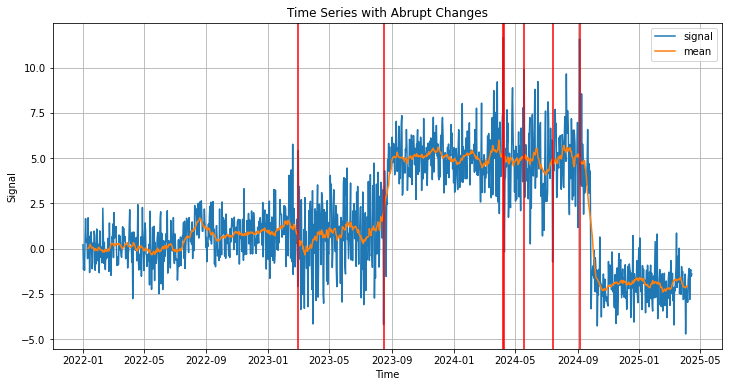

In [7]:
# Detect abrupt changes
abrupt_changes, rolling_mean = detect_abrupt_changes(signal, 0.3, 20)
abrupt_changes = abrupt_changes.astype(int)

# Plot the time series 
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')
ax.plot(rolling_mean, label='mean')

# Plot the abrupt changes
for i in signal.index[abrupt_changes == 1]:
    ax.axvline(i, color='r')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [10]:
import pandas as pd
import numpy as np

def detect_abrupt_changes_rolling(signal, percent_change, max_interval):
    """
    Detects abrupt changes in a time series signal.

    Args:
        signal (pandas.Series): One-dimensional time series signal.
        percent_change (float): Minimum percent change for detecting an abrupt change.
        max_interval (int): Maximum time interval within which the change should happen (in number of samples).

    Returns:
        list: A list containing the following:
            - pandas.Series: A boolean series indicating whether an abrupt change has occurred.
            - pandas.Series: A rolling mean series calculated over a window of size max_interval.
            - pandas.Series: A rolling standard deviation series calculated over a window of size 4*max_interval.
    """
    
    # Calculate the minimum and maximum in the moving window
    rolling_mean = signal.rolling(window=max_interval, center=True).mean()
    rolling_std = signal.rolling(window=4*max_interval, center=True).std() # MODIFCATION

    # Calculate the threshold for the minimum change required to be considered an abrupt change.
    change_threshold = 2*rolling_std * percent_change


    # Calculate the difference between the local minimum and maximum
    diff = abs(signal - rolling_mean)

    # Calculate the percent change from the local minimum to the local maximum
    #percent_diff = diff / rolling_min * 100 # MODIFCATION

    # Detect abrupt changes
    abrupt_changes = diff > change_threshold
    return [abrupt_changes, rolling_mean, rolling_std]

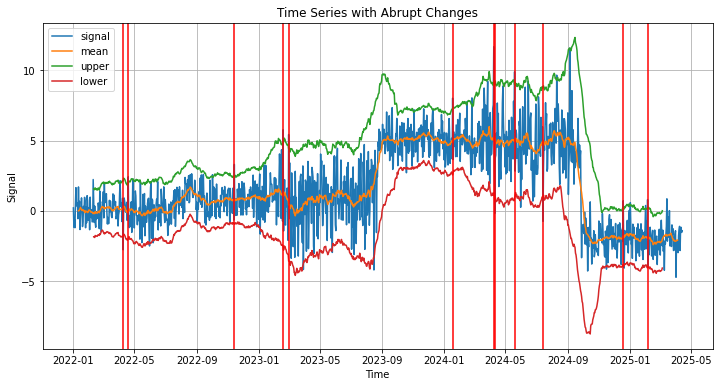

In [11]:
# Detect abrupt changes
abrupt_changes, rolling_mean, rolling_std = detect_abrupt_changes_rolling(signal, 1.2, 20)
abrupt_changes = abrupt_changes.astype(int)

# Plot the time series 
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')
ax.plot(rolling_mean, label='mean')
ax.plot(rolling_mean+2*rolling_std, label='upper')
ax.plot(rolling_mean-2*rolling_std, label='lower')

# Plot the abrupt changes
for i in signal.index[abrupt_changes == 1]:
    ax.axvline(i, color='r')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

##Topic research

**QUERY**: Are there specific change detection algorithms?

Yes, there are several change detection algorithms that can be used to detect changes or anomalies in time series data. Here are some common algorithms:

1. **Cumulative Sum (CUSUM)**: This algorithm works by calculating the cumulative sum of the deviations from the expected mean or trend. When the cumulative sum exceeds a predefined threshold, a change is detected.

2. **Exponentially Weighted Moving Average (EWMA)**: This algorithm calculates the moving average of the data, where more recent data points are given more weight. When the current value deviates from the expected value beyond a certain threshold, a change is detected.

3. **Bayesian Change Point Analysis**: This algorithm uses Bayesian inference to estimate the probability of a change point in the time series. It works by modeling the time series as a sequence of segments with different parameters, and then calculating the posterior probability of a change point.

4. **Singular Spectrum Analysis (SSA)**: This algorithm decomposes the time series into several components, including trend, seasonal, and noise components. Changes in the trend or seasonality can be detected by analyzing the changes in these components.

5. **Wavelet Transform**: This algorithm decomposes the time series into different frequency components using wavelet transform. Changes in the time series can be detected by analyzing the changes in the frequency components.

These algorithms can be used for different types of time series data and different applications, and their performance can vary depending on the specific characteristics of the data.

**QUERY**: Explain how CUSUM works and how it can be used for change detection.

The Cumulative Sum (CUSUM) algorithm is a widely used method for detecting changes in time series data. It is a sequential analysis technique that is based on the cumulative sum of the deviations from a reference or target value. The algorithm is sensitive to changes in the mean or variance of the data.

The CUSUM algorithm works by first selecting a reference or target value for the data, which is typically the mean or median of the data. The algorithm then calculates the deviation of each data point from the reference value, and cumulatively sums these deviations. If there is a change in the underlying pattern of the data, this will result in a significant deviation from the reference value, which will be reflected in the cumulative sum.

To detect a change using the CUSUM algorithm, a threshold value is set, above which the cumulative sum is considered to indicate a change. When the cumulative sum exceeds this threshold, a change is flagged at that point in the time series data. The algorithm can also be designed to detect multiple changes in the time series data.

The CUSUM algorithm can be used for a wide range of applications, including quality control, process monitoring, and anomaly detection. It is especially useful in situations where the data is subject to drift or gradual changes in the underlying pattern over time, as it is sensitive to changes in both the mean and variance of the data.

In summary, the CUSUM algorithm works by cumulatively summing the deviations of the time series data from a reference or target value, and flagging a change when the cumulative sum exceeds a predefined threshold value. It is a powerful and widely used technique for detecting changes in time series data, especially in situations where the data is subject to drift or gradual changes over time.

**QUERY**: Are there specific python packages for change detection?

Yes, there are several Python packages that include change detection algorithms for time series data. Here are a few popular ones:

1. **ruptures**: A Python library for offline change point detection. It includes various algorithms such as CUSUM, Binary Segmentation, and Dynamic Programming.

2. **bcp**: A Python library for Bayesian Change Point detection. It uses Bayesian methods to estimate the likelihood of a change point at each time step.

3. **changepoint**: A Python library for online change point detection. It includes various algorithms such as CUSUM, EWMA, and Page-Hinkley Test.

4. **py-earthquake**: A Python library for change detection in seismology. It includes algorithms such as STA/LTA and the Short Time Fourier Transform.

These packages provide a convenient way to apply change detection algorithms to time series data and can save time compared to implementing the algorithms from scratch.


In [12]:
pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.7 MB/s eta 0:00:00


In [32]:
print(rpt.__version__)

1.1.7


This routine below didn't work.

In [53]:
import numpy as np
import pandas as pd
import ruptures as rpt

def detect_changes(time_series):
    # Convert time series to a numpy array
    signal = time_series.values

    # Set up the ruptures detector
    algo = rpt.Dynp(model="l2", min_size=1, jump=1).fit(signal)
    # "model" specifies the type of cost function to use
    # "min_size" specifies the minimum length of each segment
    # "jump" specifies the minimum distance between change points

    # Detect the change points
    #result = algo.predict(n_bkps=1) # MODIFICATION

    # use the MPE criterion to automatically select the number of change points
    #result = algo.predict(pen=2) # MODIFICATION, didn't work
    #result = algo.fit_predict(signal, pen=2) # MODIFICATION 2, didn't work either

    # Convert the result to a list of change point locations
    change_points = np.where(result == 1)[0].tolist()

    # Add the start and end points to the list
    change_points = [0] + change_points + [len(signal) - 1]

    # Return the list of change point locations
    return change_points


Manual modification.

In [66]:
import numpy as np
import pandas as pd
import ruptures as rpt

def detect_changes(time_series):
    # Convert time series to a numpy array
    signal = time_series.values

    # Perform change point detection using the Pelt algorithm
    algo = rpt.Pelt(model="rbf", min_size=1, jump=10).fit(signal)
    result = algo.predict(pen=2)

    # remove location if equal to len(signal)
    change_points = [i for i in result if i < len(signal)]

    # Return the list of change point locations
    return change_points


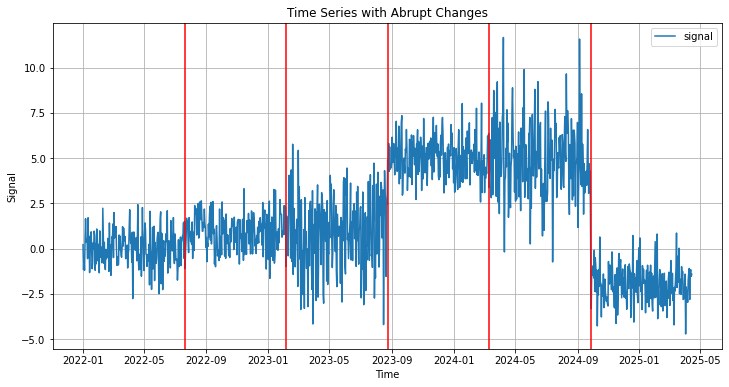

In [65]:
# Detect abrupt changes
changes = detect_changes(signal)
#abrupt_changes = abrupt_changes.astype(int)

# Plot the time series 
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')

# Plot the abrupt changes
for i in changes:
    ax.axvline(signal.index[i], color='r')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()